#### 1

1. Выберите наборы данных. которые можно интерпретировать, как временные ряды:

а) зависимость цены на недвижимость в еонкретном регионе от времени,

б) скорость полета самолета при перелете из аэропорта А в аэропорт В,

в) количество отказов компьютера,

г) число обращений в поликлинику по району,

д) координаты автобуса при движении по маршруту,

е) координаты фигуры нарушителя в файле видеофиксации охранной системы.

Все наборы можно связать с временем и интерпретировать как временные ряды

#### 2

2. вариант 1) Прочитайте DUQ_hourly.csv и проверьте качество и порядок разметки этой выборки с информацией о потреблении энергии в одном из районов Восточной Электросети США. Сделайте описание особенностей этой выборки.

2. вариант2) COVID19 EDA для любой страны кроме Китая с длиной ряда больше 50 дней ( можно обновить данные по ссылке).

In [30]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [31]:
COVID_ = pd.read_csv('covid_19_data.csv')
COVID_.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [32]:
COVID = COVID_.copy()
COVID_['Data']= pd.to_datetime(COVID_['ObservationDate']).dt.date
COVID['Data']= pd.to_datetime(COVID['ObservationDate']).dt.date

In [33]:
COVID = COVID.groupby(['Data','Country/Region'])['Confirmed','Deaths','Recovered'].sum()

In [34]:
COVID.tail(30)

Confirmed   Deaths  Recovered
Data       Country/Region                                     
2020-05-10 Spain                  224350.0  26621.0   136166.0
           Sri Lanka                 863.0      9.0      321.0
           Sudan                    1365.0     70.0      149.0
           Suriname                   10.0      1.0        9.0
           Sweden                  26322.0   3225.0     4971.0
           Switzerland             30305.0   1833.0    26600.0
           Syria                      47.0      3.0       29.0
           Taiwan                    440.0      6.0      366.0
           Tajikistan                612.0     20.0        0.0
           Tanzania                  509.0     21.0      183.0
           Thailand                 3009.0     56.0     2794.0
           Timor-Leste                24.0      0.0       21.0
           Togo                      174.0     11.0       89.0
           Trinidad and Tobago       116.0      8.0      107.0
           Tunisia                  1032.0     45.0      700.0
           Turkey                 138657.0   3786.0    92691.0
           UK                     220449.0  31930.0     1002.0
           US                    1329260.0  79526.0   216169.0
           Uganda                    121.0      0.0       55.0
           Ukraine                 15232.0    391.0     3060.0
           United Arab Emirates    18198.0    198.0     4804.0
           Uruguay                   707.0     19.0      517.0
           Uzbekistan               2418.0     10.0     1881.0
           Venezuela                 414.0     10.0      193.0
           Vietnam                   288.0      0.0      241.0
           West Bank and Gaza        375.0      2.0      263.0
           Western Sahara              6.0      0.0        5.0
           Yemen                      51.0      8.0        1.0
           Zambia                    267.0      7.0      117.0
           Zimbabwe                   36.0      4.0        9.0

In [35]:
COVID_.loc[COVID_['Country/Region'] == 'Spain', 'Country/Region'].value_counts()

Spain    100
Name: Country/Region, dtype: int64

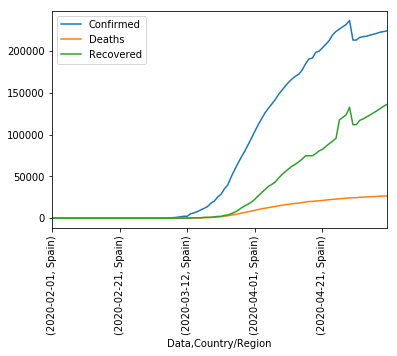

In [36]:
COVID.loc[COVID.index.get_level_values('Country/Region')=='Spain', ['Confirmed','Deaths','Recovered']].plot()
plt.xticks(label = COVID.index.get_level_values('Data'), rotation=90)

plt.show()

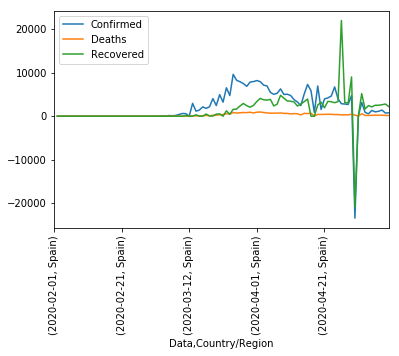

In [39]:
COVID.loc[COVID.index.get_level_values( 'Country/Region')=='Spain', ['Confirmed','Deaths','Recovered']].diff(1).plot()
plt.xticks(label = COVID.index.get_level_values('Data'), rotation=90)

plt.show()

##### Признаки

In [41]:
X1 = COVID.loc[COVID.index.get_level_values( 'Country/Region')=='Spain', ['Confirmed','Deaths','Recovered']].diff(1).values
X1[0,:] = 0

In [42]:
X2 = COVID.loc[COVID.index.get_level_values( 'Country/Region')=='Spain', ['Confirmed','Deaths','Recovered']].values 

In [43]:
X1.shape

(100, 3)

In [44]:
X2.shape

(100, 3)

In [45]:
X3 = COVID.iloc[COVID.index.get_level_values( 'Country/Region')=='Spain'].index.get_level_values( 'Data')

In [46]:
X3

Index([2020-02-01, 2020-02-02, 2020-02-03, 2020-02-04, 2020-02-05, 2020-02-06,
       2020-02-07, 2020-02-08, 2020-02-09, 2020-02-10, 2020-02-11, 2020-02-12,
       2020-02-13, 2020-02-14, 2020-02-15, 2020-02-16, 2020-02-17, 2020-02-18,
       2020-02-19, 2020-02-20, 2020-02-21, 2020-02-22, 2020-02-23, 2020-02-24,
       2020-02-25, 2020-02-26, 2020-02-27, 2020-02-28, 2020-02-29, 2020-03-01,
       2020-03-02, 2020-03-03, 2020-03-04, 2020-03-05, 2020-03-06, 2020-03-07,
       2020-03-08, 2020-03-09, 2020-03-10, 2020-03-11, 2020-03-12, 2020-03-13,
       2020-03-14, 2020-03-15, 2020-03-16, 2020-03-17, 2020-03-18, 2020-03-19,
       2020-03-20, 2020-03-21, 2020-03-22, 2020-03-23, 2020-03-24, 2020-03-25,
       2020-03-26, 2020-03-27, 2020-03-28, 2020-03-29, 2020-03-30, 2020-03-31,
       2020-04-01, 2020-04-02, 2020-04-03, 2020-04-04, 2020-04-05, 2020-04-06,
       2020-04-07, 2020-04-08, 2020-04-09, 2020-04-10, 2020-04-11, 2020-04-12,
       2020-04-13, 2020-04-14, 2020-04-15, 2020-04-1

In [51]:
X3_1 = pd.to_datetime(X3).dayofweek
X3_2 = pd.to_datetime(X3).dayofyear -  pd.to_datetime(X3[0]).dayofyear

In [52]:
XX = np.concatenate([X1,X2], axis= 1)

In [53]:
XX = np.concatenate([XX,np.array(X3_1).reshape((XX.shape[0],1))], axis= 1)

In [54]:
XX = np.concatenate([XX,np.array(X3_2).reshape((XX.shape[0],1))], axis= 1)

In [55]:
XX.shape

(100, 8)

In [56]:
COVID_Data = pd.DataFrame(data= XX, index= X3)

In [57]:
COVID_Data.head()

,0,1,2,3,4,5,6,7
Data,,,,,,,,
2020-02-01,0.0,0.0,0.0,1.0,0.0,0.0,5.0,0.0
2020-02-02,0.0,0.0,0.0,1.0,0.0,0.0,6.0,1.0
2020-02-03,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0
2020-02-04,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0
2020-02-05,0.0,0.0,0.0,1.0,0.0,0.0,2.0,4.0


In [58]:
COVID_Data.tail()

,0,1,2,3,4,5,6,7
Data,,,,,,,,
2020-05-06,996.0,244.0,2516.0,220325.0,25857.0,126002.0,2.0,95.0
2020-05-07,1122.0,213.0,2509.0,221447.0,26070.0,128511.0,3.0,96.0
2020-05-08,1410.0,229.0,2637.0,222857.0,26299.0,131148.0,4.0,97.0
2020-05-09,721.0,179.0,2804.0,223578.0,26478.0,133952.0,5.0,98.0
2020-05-10,772.0,143.0,2214.0,224350.0,26621.0,136166.0,6.0,99.0


In [59]:
p = 10 # 10 дней назад по истории
h=1    # 1 день вперед предсказываем

In [60]:
y = COVID_Data.iloc[h+p:,3]
y

Data
2020-02-12         2.0
2020-02-13         2.0
2020-02-14         2.0
2020-02-15         2.0
2020-02-16         2.0
2020-02-17         2.0
2020-02-18         2.0
2020-02-19         2.0
2020-02-20         2.0
2020-02-21         2.0
2020-02-22         2.0
2020-02-23         2.0
2020-02-24         2.0
2020-02-25         6.0
2020-02-26        13.0
2020-02-27        15.0
2020-02-28        32.0
2020-02-29        45.0
2020-03-01        84.0
2020-03-02       120.0
2020-03-03       165.0
2020-03-04       222.0
2020-03-05       259.0
2020-03-06       400.0
2020-03-07       500.0
2020-03-08       673.0
2020-03-09      1073.0
2020-03-10      1695.0
2020-03-11      2277.0
2020-03-12      2277.0
                ...   
2020-04-11    163027.0
2020-04-12    166831.0
2020-04-13    170099.0
2020-04-14    172541.0
2020-04-15    177644.0
2020-04-16    184948.0
2020-04-17    190839.0
2020-04-18    191726.0
2020-04-19    198674.0
2020-04-20    200210.0
2020-04-21    204178.0
2020-04-22    208389.0
2020-0

In [61]:
X =[]
for i in range(len(y)):
    xx = XX[i:i+p,:]
    X.append(xx.reshape(8*p))

In [62]:
X = np.array(X).reshape((COVID_Data.shape[0]-p-h,8*p))
y=np.array(y).reshape((COVID_Data.shape[0]-p-h,1))

In [63]:
X.shape

(89, 80)

In [64]:
y.shape

(89, 1)

In [65]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

N=-10
x_train,y_train,x_test,y_test=X[:N,:],y[:N,:],X[N:,:],y[N:,:]
# пока строим одну
model_lb = LinearRegression()

In [66]:
model_lb.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [67]:
y_pred = model_lb.predict(x_test)
y_pred_t = model_lb.predict(x_train)

In [68]:
error_ =np.mean(np.abs(y_pred-y_test))
print(error_)

36352.162237508914


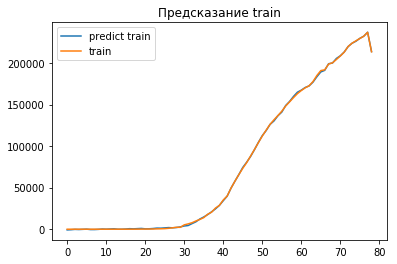

In [69]:
plt.plot(y_pred_t, label='predict train')
plt.plot(y_train, label='train')
plt.legend()
plt.title('Предсказание train')
plt.show()

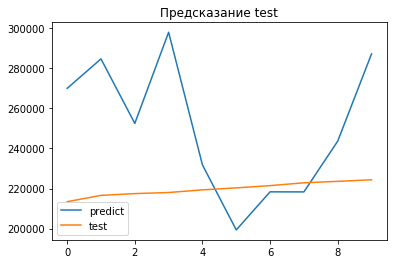

In [70]:
plt.plot(y_pred, label='predict')
plt.plot(y_test, label='test')
plt.legend()
plt.title('Предсказание test')
plt.show()

In [71]:
error_p =np.mean(np.abs(y_pred-y_test)/y_test)*100

print('error in MAPE :', error_p, '%')

error in MAPE : 16.630098564232735 %


#### 3

3. вариант 1) Прочитайте базу Brent и сделайте ее перерасчет (ресемплинг) в представление по неделям , по месяцам . Постройте график изменения среднего по выборке и среднего отклонения по выборке на недельных, месячных и годовых группах для Brent. (одна группа на интервале - одно значение std или mean, т.е. если было 28 деней, то 9 значений для ресемплинга на 3 дня, 4 значения при ресемплинге неделя и 2 значения при ресемплинге 2 недели )

3. вариант 2) Сделайте ресемплинг COVID19 на интервалы 3 дня, неделя, 2 недели.Постройте график изменения среднего по выборке и среднего отклонения по выборке на группах для интервалах 3 дня, неделя, 2 недели (одна группа на интервале - одно значение std или mean, т.е. если было 28 деней, то 9 значений для ресемплинга на 3 дня, 4 значения при ресемплинге неделя и 2 значения при ресемплинге 2 недели )

In [84]:
brent_data = pd.read_excel('нефть-brent 2010-2019.xlsx', index_col=[0], parse_dates=[0])
brent_data.head()

,Value
Datetime,
2019-09-01,58.84
2019-08-30,59.19
2019-08-29,60.37
2019-08-28,59.84
2019-08-27,59.59


In [94]:
brent_data_week = brent_data.copy()
brent_data_week.asfreq(freq='2D').head()

,Value
Datetime,
